In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, r2_score
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

### Scenario-1: Bob's Travel 
    Bob is a young college student who leaves in Nagpur. He takes bus to travel around the city, as well as to go 
    to college. The bus fare around the city is based on the distance travelled by the passenger. At certain times, 
    bob found himself short of cash and had to walk back home or to nearest atm for more cash. As a beginner 
    in data science he thought of collecting the data of travel and fare daily. On a daily basis, he started collecting 
    the amount money spent on bus fares and distance travelled by him. He did this for around four months and 
    collected the data in a csv file. On a certain day, he got a birthday party invite from his college friend who 
    lives 75KM from his home. Could you help him to find out how much money he should keep with himself to 
    go to his friend's house and come back? 
    Dataset Description: 
    • Distance_km: Distance travelled in km(real)
    • Fare: Fare in INR
    
    Task to be Performed: 
    • Calculate the slope and the intercept by using the given formula of slope upto 2 decimal places -
    Beginner
    • Plot the regression line using matplotlib - Beginner
    • Use scikit learn linear regression to calculate the intercept and slope again without any parameters -
    Beginner
    • Calculate the R2 score of the model using scikit learn - Beginner
    • Use scikit learn linear regression to calculate the intercept and slope again without any parameters -
    Beginner
    • Can Ridge Regression perform better than Linear Regression? - Advanced
    ■ Train the model using alpha= 1000
    ■ Predict the fare amount when bob wants to travel 150 KM
    ■ Calculate the R2 Score
    ■ Why the model produced different values?

In [3]:
df = pd.read_csv('College_Travel.csv')
df.head()

,Distance_km,Fare
0,64.623207,12.840647
1,76.668010,13.124668
2,59.081022,13.771331
3,74.584815,13.938487
4,59.753260,14.185716


In [80]:
mean_distance = df['Distance_km'].mean()
std_distance = df['Distance_km'].std()
mean_fare = df['Fare'].mean()
std_fare = df['Fare'].std()

print(f"Mean Distance: {mean_distance}, Std Distance: {std_distance}, Mean Fare: {mean_fare}, Std Fare {std_fare}")

Mean Distance: 82.62510529721636, Std Distance: 11.55359975128525, Mean Fare: 21.74525431534134, Std Fare 4.975915951106848


In [81]:
sum_of_products = sum((df['Distance_km'] - mean_distance)*(df['Fare'] - mean_fare))
print(sum_of_products)

5890.422051327345


In [82]:
r = sum_of_products/(std_distance*std_fare*(df.shape[0]-1))
print(f"r: {r}")

r: 0.8610117884342492


In [83]:
m = r*(std_fare/std_distance)
print(f'm: {m}')

m: 0.37082142227442294


In [84]:
#y = mx + b
#b = (y - mx)

b = mean_fare - (m*mean_distance)
print(f"b: {b}")

b: -8.893904746546387


In [85]:
mean_fare , (m*mean_distance)

(21.74525431534134, 30.639159061887728)

In [86]:
df['Fare_Pred'] = m*df['Distance_km'] + b
df.head()

,Distance_km,Fare,Fare_Pred
0,64.623207,12.840647,15.069765
1,76.668010,13.124668,19.536236
2,59.081022,13.771331,13.014604
3,74.584815,13.938487,18.763742
4,59.753260,14.185716,13.263884


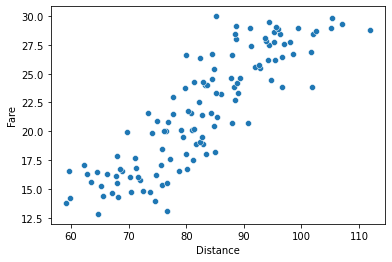

In [87]:
sns.scatterplot(data=df,x='Distance_km', y='Fare')
plt.xlabel('Distance')
plt.ylabel('Fare')
#plt.ylim([0,50])
#plt.xlim([0,150])
plt.show()

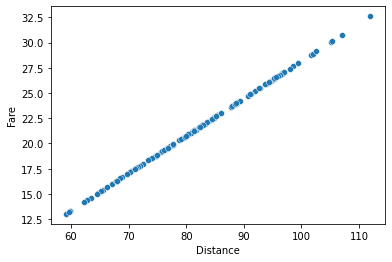

In [88]:
sns.scatterplot(data=df,x='Distance_km', y='Fare_Pred')
plt.xlabel('Distance')
plt.ylabel('Fare')
#plt.ylim([0,50])
#plt.xlim([0,150])
plt.show()

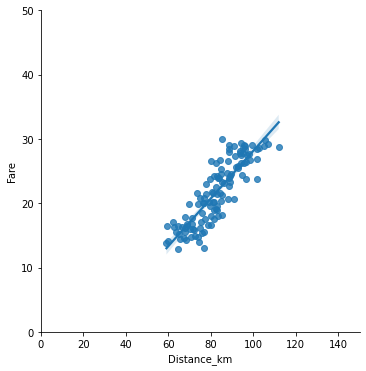

In [89]:
result = sns.lmplot(data=df, x='Distance_km', y='Fare')
plt.ylim([0,50])
plt.xlim([0,150])
plt.show()

In [90]:
X = df[['Distance_km']]
y = df[['Fare']]
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [91]:
lr.coef_, lr.intercept_, lr.score(X, y)

(array([[0.37082142]]), array([-8.89390475]), 0.741341299822744)

In [95]:
r2_score(df['Fare'], df['Fare_Pred'])

0.741341299822744

In [108]:
X = df[['Distance_km']]
y = df[['Fare']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [111]:
models = {'LinearRegression': LinearRegression(), 'Ridge': Ridge(alpha=1000)}
for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"{key}: R2 Score: {r2_score(y_test, y_pred)}")

LinearRegression: R2 Score: 0.7434299954747913
Ridge: R2 Score: 0.7562836746562807


In [112]:
for key in models.keys():
    model = models[key]
    y_pred = model.predict([[150]])
    print(f"Predicted value for 150KM for {key}: {y_pred}")

Predicted value for 150KM for LinearRegression: [[47.58824094]]
Predicted value for 150KM for Ridge: [[45.29054058]]
